In [4]:
import pandas as pd
import re

# Import required libraries
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn import metrics
from matplotlib import pyplot
import seaborn as sns
# sns.set(style= "darkgrid", color_codes = True)
from catboost import CatBoostClassifier
import pandas as pd
from numpy import mean
from numpy import std

import warnings
warnings.filterwarnings('ignore')

In [5]:
file_path = "dataset_cleaned.csv"
df = pd.read_csv(file_path)
print(df.shape)
print(df.info()) 

(2608, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2608 entries, 0 to 2607
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2608 non-null   int64  
 1   Gender          2608 non-null   int64  
 2   BMI             2608 non-null   float64
 3   SBP             2608 non-null   float64
 4   DBP             2608 non-null   float64
 5   FPG             2608 non-null   float64
 6   Chol            2608 non-null   float64
 7   Tri             2608 non-null   float64
 8   HDL             2608 non-null   float64
 9   LDL             2608 non-null   float64
 10  ALT             2608 non-null   float64
 11  AST             2608 non-null   float64
 12  BUN             2608 non-null   float64
 13  CCR             2608 non-null   float64
 14  FFPG            2608 non-null   float64
 15  smoking         2608 non-null   float64
 16  drinking        2608 non-null   float64
 17  family_history  2608 n

In [6]:
#Split dataset
x= df.drop(columns='Diabetes')
y= df['Diabetes']
X_train, X_val, y_train, y_val=train_test_split(x,y, shuffle=True, random_state=12, test_size=0.1)

In [7]:
scaler = StandardScaler()

X_V = X_val.values
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_val = scaler.transform(X_V)

In [9]:
param_grid = {
    'iterations': [50, 100, 150],
    'learning_rate': [0.05, 0.01, 0.1],
    'max_depth': [2, 4, 6, 8],
    'l2_leaf_reg' : [2,4,6,8],
    'rsm' : [0.3,0.5,0.6],
}


model = CatBoostClassifier()

# Perform grid search to find the best hyperparameters
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid=param_grid, cv=kfold, n_jobs=-1)
grid_search.fit(scaled_x_train,y_train)

# Print the best hyperparameters and the corresponding score
print("Best score: {:.4f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

KeyboardInterrupt: 

In [10]:
model = CatBoostClassifier(verbose=0, eval_metric='Accuracy',iterations=150, learning_rate=0.1 ,max_depth=4 ,l2_leaf_reg=6 ,rsm=0.6)
model.fit(scaled_x_train, y_train)
y_pred = model.predict(scaled_x_val)

cv = StratifiedKFold(n_splits=10)

n_scores = cross_val_score(model, scaled_x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print("Accuracy score (training): {0:.3f}".format(model.score(scaled_x_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(model.score(scaled_x_val, y_val)))

Mean Accuracy: 0.938 (0.019)
Accuracy score (training): 0.952
Accuracy score (validation): 0.954


In [11]:
print(classification_report(y_val,y_pred))
cm = confusion_matrix(y_val, y_pred)
print('Confusion Matrix : \n', cm)

total=sum(sum(cm))
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
print('f1 score:', f1_score(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96       133
         1.0       0.97      0.94      0.95       128

    accuracy                           0.95       261
   macro avg       0.95      0.95      0.95       261
weighted avg       0.95      0.95      0.95       261

Confusion Matrix : 
 [[129   4]
 [  8 120]]
Sensitivity :  0.9699248120300752
Specificity :  0.9375
f1 score: 0.9523809523809523


<Axes: >

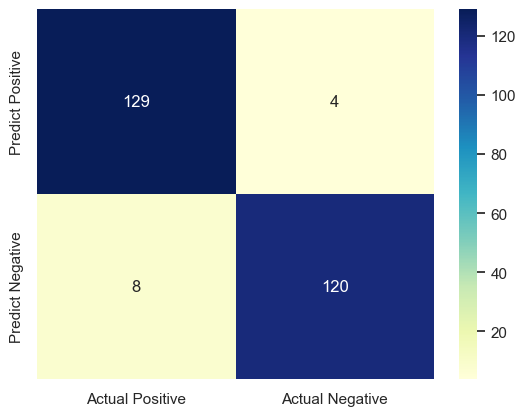

In [12]:
cm_matrix = pd.DataFrame(
    data=cm,
    columns=["Actual Positive", "Actual Negative"],
    index=["Predict Positive", "Predict Negative"],
)

sns.heatmap(cm_matrix, annot=True, fmt="d", cmap="YlGnBu")